<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/Deep_Learning/Example_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(len(train_labels))
print(len(test_labels))

60000
10000


In [9]:
model = keras.Sequential([layers.Dense(512, activation="relu"), 
                          layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2546 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9891


In [15]:
def display_img(img, target, ax):
  img = img.reshape((28,28))
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Digit: {str(target)}')
  ax.grid(False)

[5.7942390e-11 3.0504202e-12 2.3030756e-07 4.0165146e-06 6.3611117e-13
 3.6804060e-09 9.0662119e-16 9.9999571e-01 1.4373803e-09 1.5601403e-08]
Predicted label: 7
Expected label: 7


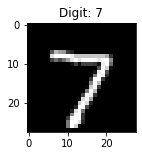

In [22]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
print(predictions[0])
print(f"Predicted label: {predictions[0].argmax()}")
print(f"Expected label: {test_labels[0]}")

fig, ax = plt.subplots(1,1,figsize=(2,2))
display_img(test_digits[0], test_labels[0], ax)

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9788
Test accuracy: 0.979
